## Import

Modèle SGDRegressor <br/>
cf https://github.com/sylla2022-arc/Apprentissage-automatique-Regression/blob/main/Prediction_Co2/Notebook_2_prediction_Apprentissag_automatique_Regression_CO2.ipynb

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("my_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70078 entries, 0 to 70077
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cnit         70078 non-null  object 
 1   mine         70078 non-null  object 
 2   marque       70078 non-null  object 
 3   modele       70078 non-null  object 
 4   dscom        70078 non-null  object 
 5   carburant    70078 non-null  object 
 6   hybride      39593 non-null  object 
 7   puiss_admin  70078 non-null  float64
 8   puiss_max    70078 non-null  float64
 9   boite_v      70078 non-null  object 
 10  conso_urb    70008 non-null  object 
 11  conso_exurb  70008 non-null  object 
 12  conso_mixte  70011 non-null  object 
 13  masse_v_min  0 non-null      float64
 14  masse_v_max  0 non-null      float64
 15  co2          70011 non-null  float64
 16  co_typ_1     39483 non-null  object 
 17  hc           8077 non-null   object 
 18  nox          39483 non-null  object 
 19  hcno

## Nettoyage

In [4]:
df.drop(columns=['conso_urb', 'conso_exurb', 'conso_mixte', 'masse_v_min', 'masse_v_max',
                 'co_typ_1', 'hc', 'nox', 'hcnox', 'particules'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70078 entries, 0 to 70077
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cnit         70078 non-null  object 
 1   mine         70078 non-null  object 
 2   marque       70078 non-null  object 
 3   modele       70078 non-null  object 
 4   dscom        70078 non-null  object 
 5   carburant    70078 non-null  object 
 6   hybride      39593 non-null  object 
 7   puiss_admin  70078 non-null  float64
 8   puiss_max    70078 non-null  float64
 9   boite_v      70078 non-null  object 
 10  co2          70011 non-null  float64
 11  dataset      70078 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 6.4+ MB


In [6]:
df['hybride'].fillna('non', inplace=True)
df.dropna(subset=['co2'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70011 entries, 0 to 70077
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cnit         70011 non-null  object 
 1   mine         70011 non-null  object 
 2   marque       70011 non-null  object 
 3   modele       70011 non-null  object 
 4   dscom        70011 non-null  object 
 5   carburant    70011 non-null  object 
 6   hybride      70011 non-null  object 
 7   puiss_admin  70011 non-null  float64
 8   puiss_max    70011 non-null  float64
 9   boite_v      70011 non-null  object 
 10  co2          70011 non-null  float64
 11  dataset      70011 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 6.9+ MB


In [8]:
df

,cnit,mine,marque,modele,dscom,carburant,hybride,puiss_admin,puiss_max,boite_v,co2,dataset
0,M10ALFVP000M091,937BXA1A05L,ALFA-ROMEO,ALFA 147,147 1.6 TS (105ch),ES,non,7.0,77.0,M 5,196.0,2011
1,M10ALFVP000P093,937BXB1A06L,ALFA-ROMEO,ALFA 147,147 1.6 TS (120ch),ES,non,8.0,88.0,M 5,194.0,2011
2,MAL1301JZ595,937AXA1A00H,ALFA-ROMEO,ALFA 147,147 3P 1.6 TS (105ch),ES,non,7.0,77.0,M 5,196.0,2011
3,MAL1401JB597,937AXB1A01H,ALFA-ROMEO,ALFA 147,147 3P 1.6 TS (120ch),ES,non,8.0,88.0,M 5,194.0,2011
4,MAL1601JX599,937AXC1102H,ALFA-ROMEO,ALFA 147,147 3P 2.0 SELESPEED,ES,non,10.0,110.0,M 5,211.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
70073,MFT5422JX524,198AXL1B08D,FIAT,BRAVO,BRAVO 1.6 MultiJet (120ch) Sport Euro 5,GO,non,6.0,88.0,M 6,129.0,2012
70074,MFT5722JS525,198AXN1B12C,FIAT,BRAVO,BRAVO 2.0 MultiJet (165ch) Euro 5,GO,non,9.0,121.0,M 6,139.0,2012
70075,MFT5722JT526,198AXN1B12D,FIAT,BRAVO,BRAVO 2.0 MultiJet (165ch) Sport Euro 5,GO,non,9.0,121.0,M 6,139.0,2012
70076,MLC5402BX575,844AXC1105C,LANCIA,DELTA,Delta 1.6 MultiJet (120ch) DPF Selectronic,GO,non,6.0,88.0,M 6,120.0,2012


## Modèle

In [9]:
Y = df['co2']
X = df.drop(['cnit', 'mine', 'dscom', 'co2', 'dataset'] ,axis =1)

In [10]:
# variables numeriques > StandarScaler 
var_num = X.select_dtypes(include = ['float', 'int']).columns.to_list()
print(var_num)

['puiss_admin', 'puiss_max']


In [11]:
# variables catégorielles > OneHotEncoder
var_cat = X.select_dtypes(include = ['object']).columns.to_list()
print(var_cat)

['marque', 'modele', 'carburant', 'hybride', 'boite_v']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor, make_column_transformer

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.model_selection import GridSearchCV

import time


In [13]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state =5)


In [14]:
# normalisation
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown = 'ignore'))
preprocessor = make_column_transformer( 
                          (num_pipeline, var_num),
                          (cat_pipeline, var_cat),
                           remainder="passthrough"
                        )

In [15]:
%time
model_sgdr = make_pipeline(preprocessor, TransformedTargetRegressor(regressor = SGDRegressor(alpha = 0.0002,
                                                                epsilon = 0, penalty ='l1', random_state =5))
    
)
model_sgdr.fit(X_train, y_train)


CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.34 µs


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['puiss_admin', 'puiss_max']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marque', 'modele',
                                                   'carburant', 'hybride',
                                                   'boite_v'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=SGDRegressor(alpha=0.0002,
                                                                   epsilon=0,
                                                                   penalty='l1',
                                                                   random_state=5)))])

In [16]:
y_pred_sgdr = model_sgdr.predict(X_test)


In [17]:
pd.DataFrame.from_dict({'Valeurs réelles': y_test.values.ravel(), "Valeurs predictes": y_pred_sgdr}).head()


,Valeurs réelles,Valeurs predictes
0,252.0,244.893897
1,227.0,249.379249
2,224.0,228.282056
3,224.0,228.282056
4,232.0,215.682298


In [21]:
print("score R2 de performance sur le  test set : {}" .format(np.round(model_sgdr.score(X_test, y_test), 5)))
print("mean absolute error (MAE) :{}".format(np.round(np.round(mean_absolute_error(y_test,y_pred_sgdr)), 2)))
print("RMSE :{}" .format(np.round(np.sqrt(mean_absolute_error(y_test,y_pred_sgdr)), 3)))

score R2 de performance sur le  test set : 0.92279
mean absolute error (MAE) :10.0
RMSE :3.09


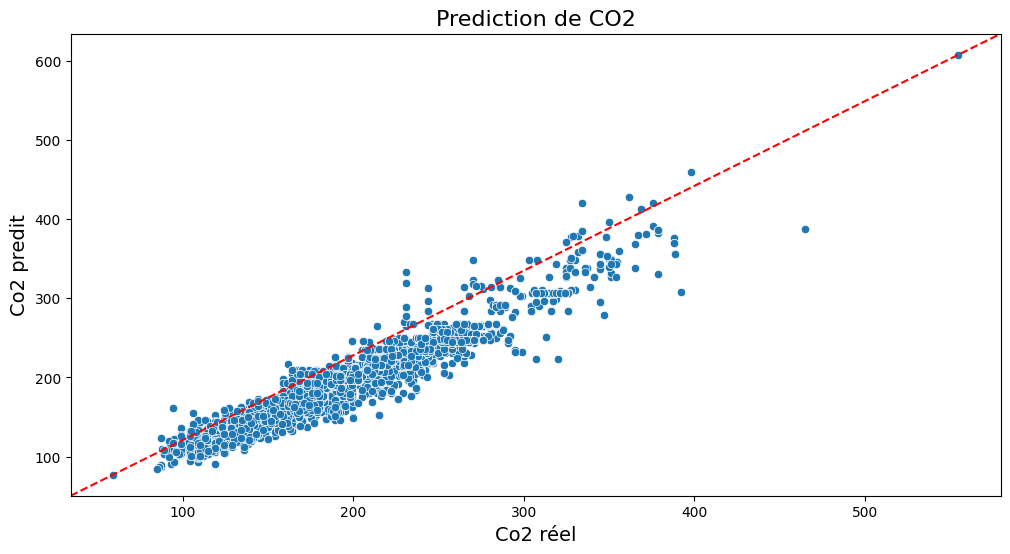

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots( figsize = (12,6))
sns.scatterplot( x = y_test, y = y_pred_sgdr)

ax.plot([0,1], [0,1], ls ='--', c ='red', transform = ax.transAxes)
plt.ylabel("Co2 predit", fontsize = 14)
plt.xlabel("Co2 réel", fontsize = 14)
ax.set_title("Prediction de CO2", fontsize = 16)
plt.show()

## Export

In [19]:
from joblib import dump, load

In [20]:
dump(model_sgdr, 'model_sgdr.joblib')


['model_sgdr.joblib']